In [64]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve,f1_score,roc_auc_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
%matplotlib inline

In [65]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [66]:
# Importing the dataset
url_v3='/content/drive/MyDrive/ApacheProjectDataset/apache-ant-1.3.csv'
dataset_v3 = pd.read_csv(url_v3)

In [67]:
url_v4='/content/drive/MyDrive/ApacheProjectDataset/apache-ant-1.4.csv'
dataset_v4 = pd.read_csv(url_v4)

In [68]:
url_v5='/content/drive/MyDrive/ApacheProjectDataset/apache-ant-1.5.csv'
dataset_v5 = pd.read_csv(url_v5)

In [69]:
url_v6='/content/drive/MyDrive/ApacheProjectDataset/apache-ant-1.6.csv'
dataset_v6 = pd.read_csv(url_v6)

In [70]:
url_v7='/content/drive/MyDrive/ApacheProjectDataset/apache-ant-1.7.csv'
dataset_v7 = pd.read_csv(url_v7)

In [71]:
dataset = pd.concat([dataset_v3 , dataset_v4 , dataset_v5,dataset_v6,dataset_v7],ignore_index=True)
dataset

,project-name,version,name,wmc,dit,noc,cbo,rfc,lcom,ca,...,ostrand,scattering,intensity,ana,acm,arl,acpd,bug,is-buggy,is-buggy-boolean
0,ant,1.3,org.apache.tools.ant.taskdefs.ExecuteOn,11,4,2,14,42,29,2,...,2.0,10.0,0.37,2.0,4.0,2.0,1.73,0,0,False
1,ant,1.3,org.apache.tools.ant.DefaultLogger,14,1,1,8,32,49,4,...,2.0,29.0,0.00,1.0,7.0,5.0,2.68,2,1,True
2,ant,1.3,org.apache.tools.ant.taskdefs.TaskOutputStream,3,2,0,1,9,0,0,...,3.0,25.0,0.64,1.0,9.0,1.0,5.69,0,0,False
3,ant,1.3,org.apache.tools.ant.taskdefs.Cvs,12,3,0,12,37,32,0,...,1.0,12.0,0.35,3.0,3.0,1.0,1.41,0,0,False
4,ant,1.3,org.apache.tools.ant.taskdefs.Copyfile,6,3,0,4,21,1,0,...,2.0,24.0,0.35,1.0,9.0,4.0,1.17,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1687,ant,1.7,org.apache.tools.ant.taskdefs.Javadoc,92,3,0,34,261,3726,8,...,2.0,31.0,9.44,3.0,4.0,3.0,4.02,4,1,True
1688,ant,1.7,org.apache.tools.ant.types.selectors.BaseSelector,6,3,6,10,10,3,7,...,3.0,32.0,0.02,3.0,3.0,3.0,5.51,0,0,False
1689,ant,1.7,org.apache.tools.ant.types.resources.selectors...,7,3,5,9,26,0,5,...,2.0,23.0,0.54,2.0,1.0,5.0,6.10,0,0,False
1690,ant,1.7,org.apache.tools.ant.taskdefs.compilers.Gcj,5,2,0,8,34,8,1,...,2.0,37.0,0.00,2.0,1.0,4.0,5.02,1,1,True


In [72]:
def generate_model_report(y_actual, y_predicted):
    print("Accuracy = " , accuracy_score(y_actual, y_predicted))
    print("Precision = " ,precision_score(y_actual, y_predicted))
    print("Recall = " ,recall_score(y_actual, y_predicted))
    print("F1 Score = " ,f1_score(y_actual, y_predicted))
    pass


In [73]:
def generate_auc_roc_curve(lr, X_test):
    y_pred_proba = lr.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test,  y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr,tpr,label="AUC ROC: ="+str(auc))
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr,tpr)
    plt.legend(loc=4)
    plt.show()
    pass

In [74]:
dataset.head()

,project-name,version,name,wmc,dit,noc,cbo,rfc,lcom,ca,...,ostrand,scattering,intensity,ana,acm,arl,acpd,bug,is-buggy,is-buggy-boolean
0,ant,1.3,org.apache.tools.ant.taskdefs.ExecuteOn,11,4,2,14,42,29,2,...,2.0,10.0,0.37,2.0,4.0,2.0,1.73,0,0,False
1,ant,1.3,org.apache.tools.ant.DefaultLogger,14,1,1,8,32,49,4,...,2.0,29.0,0.00,1.0,7.0,5.0,2.68,2,1,True
2,ant,1.3,org.apache.tools.ant.taskdefs.TaskOutputStream,3,2,0,1,9,0,0,...,3.0,25.0,0.64,1.0,9.0,1.0,5.69,0,0,False
3,ant,1.3,org.apache.tools.ant.taskdefs.Cvs,12,3,0,12,37,32,0,...,1.0,12.0,0.35,3.0,3.0,1.0,1.41,0,0,False
4,ant,1.3,org.apache.tools.ant.taskdefs.Copyfile,6,3,0,4,21,1,0,...,2.0,24.0,0.35,1.0,9.0,4.0,1.17,0,0,False


In [75]:
dataset.sample(5)
#Pandas sample() is used to generate a sample random row or column from the function caller data frame.

,project-name,version,name,wmc,dit,noc,cbo,rfc,lcom,ca,...,ostrand,scattering,intensity,ana,acm,arl,acpd,bug,is-buggy,is-buggy-boolean
1523,ant,1.7,org.apache.tools.ant.taskdefs.optional.extensi...,7,1,0,12,46,21,4,...,1.0,15.0,1.38,3.0,1.0,4.0,3.93,0,0,False
56,ant,1.3,org.apache.tools.ant.taskdefs.SQLExec,23,3,0,10,96,175,1,...,1.0,24.0,0.93,2.0,6.0,2.0,2.31,0,0,False
946,ant,1.6,org.apache.tools.ant.util.LoaderUtils,8,1,0,6,21,28,3,...,1.0,12.0,1.14,2.0,3.0,3.0,7.37,0,0,False
1052,ant,1.7,org.apache.tools.ant.types.Mapper,15,3,0,25,44,45,16,...,3.0,15.0,1.45,1.0,1.0,2.0,2.42,0,0,False
1283,ant,1.7,org.apache.tools.ant.input.MultipleChoiceInput...,3,2,0,3,10,0,2,...,3.0,2.0,1.03,3.0,2.0,5.0,2.34,0,0,False


In [76]:
dataset['is-buggy'].value_counts()
#now we know our dataset is imbalance

0    1342
1     350
Name: is-buggy, dtype: int64

In [77]:
dataset['is-buggy'].describe()

count    1692.000000
mean        0.206856
std         0.405171
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: is-buggy, dtype: float64

In [78]:
list(dataset.columns)
#list(dataset.columns.values)

['project-name',
 'version',
 'name',
 'wmc',
 'dit',
 'noc',
 'cbo',
 'rfc',
 'lcom',
 'ca',
 'ce',
 'npm',
 'lcom3',
 'loc',
 'dam',
 'moa',
 'mfa',
 'cam',
 'ic',
 'cbm',
 'amc',
 'max_cc',
 'avg_cc',
 'fi-changes',
 'ostrand',
 'scattering',
 'intensity',
 'ana',
 'acm',
 'arl',
 'acpd',
 'bug',
 'is-buggy',
 'is-buggy-boolean']

In [79]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 34 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   project-name      1692 non-null   object 
 1   version           1692 non-null   float64
 2   name              1692 non-null   object 
 3   wmc               1692 non-null   int64  
 4   dit               1692 non-null   int64  
 5   noc               1692 non-null   int64  
 6   cbo               1692 non-null   int64  
 7   rfc               1692 non-null   int64  
 8   lcom              1692 non-null   int64  
 9   ca                1692 non-null   int64  
 10  ce                1692 non-null   int64  
 11  npm               1692 non-null   int64  
 12  lcom3             1692 non-null   float64
 13  loc               1692 non-null   int64  
 14  dam               1692 non-null   float64
 15  moa               1692 non-null   int64  
 16  mfa               1692 non-null   float64


In [80]:
dataset.shape


(1692, 34)

In [81]:
#dataset.drop(columns=['project-name','version','name','acpd', 'is-buggy-boolean'],axis=1,inplace=True)
dataset.drop(['project-name','version','name','is-buggy-boolean'],axis=1,inplace=True)
dataset.head()

,wmc,dit,noc,cbo,rfc,lcom,ca,ce,npm,lcom3,...,fi-changes,ostrand,scattering,intensity,ana,acm,arl,acpd,bug,is-buggy
0,11,4,2,14,42,29,2,12,5,0.725000,...,34.0,2.0,10.0,0.37,2.0,4.0,2.0,1.73,0,0
1,14,1,1,8,32,49,4,4,12,0.835165,...,71.0,2.0,29.0,0.00,1.0,7.0,5.0,2.68,2,1
2,3,2,0,1,9,0,0,1,1,0.000000,...,53.0,3.0,25.0,0.64,1.0,9.0,1.0,5.69,0,0
3,12,3,0,12,37,32,0,12,12,0.858586,...,36.0,1.0,12.0,0.35,3.0,3.0,1.0,1.41,0,0
4,6,3,0,4,21,1,0,4,6,0.700000,...,53.0,2.0,24.0,0.35,1.0,9.0,4.0,1.17,0,0


In [82]:
#dataset=dataset.isnull().value_counts()
pd.isnull(dataset).sum().sum()
#pd.isnull(dataset)

0

In [83]:
#How to get column names in Pandas dataframe  note: it does not work in colab notebook but works in
len(dataset.columns)

30

In [84]:
dataset.dtypes

wmc             int64
dit             int64
noc             int64
cbo             int64
rfc             int64
lcom            int64
ca              int64
ce              int64
npm             int64
lcom3         float64
loc             int64
dam           float64
moa             int64
mfa           float64
cam           float64
ic              int64
cbm             int64
amc           float64
max_cc          int64
avg_cc        float64
fi-changes    float64
ostrand       float64
scattering    float64
intensity     float64
ana           float64
acm           float64
arl           float64
acpd          float64
bug             int64
is-buggy        int64
dtype: object

<Axes: xlabel='is-buggy', ylabel='count'>

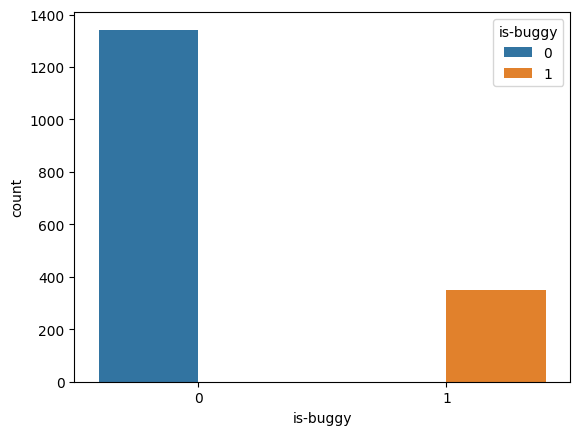

In [85]:
#seaborn.countplot() method is used to Show the counts of observations in each categorical bin using bars.
sns.countplot(x = 'is-buggy',hue = 'is-buggy', data = dataset)

In [86]:
#Step 3: Splitting the dataset into the Training set and Test set. ...

#Let's drop the target coloumn before we do train test split
#X = dataset.drop('is-buggy',axis=1).values
X = dataset.iloc[:, :-1].values
X

array([[11.  ,  4.  ,  2.  , ...,  2.  ,  1.73,  0.  ],
       [14.  ,  1.  ,  1.  , ...,  5.  ,  2.68,  2.  ],
       [ 3.  ,  2.  ,  0.  , ...,  1.  ,  5.69,  0.  ],
       ...,
       [ 7.  ,  3.  ,  5.  , ...,  5.  ,  6.1 ,  0.  ],
       [ 5.  ,  2.  ,  0.  , ...,  4.  ,  5.02,  1.  ],
       [ 2.  ,  1.  ,  0.  , ...,  3.  ,  4.31,  0.  ]])

In [87]:
X.dtype

dtype('float64')

In [88]:

#y = dataset['is-buggy']
y = dataset.iloc[:, -1].values.astype(np.float64)
y

array([0., 1., 0., ..., 0., 1., 0.])

In [89]:
dataset['is-buggy'].value_counts()

0    1342
1     350
Name: is-buggy, dtype: int64

In [90]:
# Class count of buggy or not buggy
count_class_0, count_class_1 = dataset['is-buggy'].value_counts()

# Divide by class
df_none_buggy_0 = dataset[dataset['is-buggy'] == 0]
df_buggy_1 = dataset[dataset['is-buggy'] == 1]

In [91]:
count_class_0

1342

In [92]:
count_class_1

350

In [93]:
df_none_buggy_0.head(2)

,wmc,dit,noc,cbo,rfc,lcom,ca,ce,npm,lcom3,...,fi-changes,ostrand,scattering,intensity,ana,acm,arl,acpd,bug,is-buggy
0,11,4,2,14,42,29,2,12,5,0.725,...,34.0,2.0,10.0,0.37,2.0,4.0,2.0,1.73,0,0
2,3,2,0,1,9,0,0,1,1,0.000,...,53.0,3.0,25.0,0.64,1.0,9.0,1.0,5.69,0,0


In [94]:
df_buggy_1.head(2)

,wmc,dit,noc,cbo,rfc,lcom,ca,ce,npm,lcom3,...,fi-changes,ostrand,scattering,intensity,ana,acm,arl,acpd,bug,is-buggy
1,14,1,1,8,32,49,4,4,12,0.835165,...,71.0,2.0,29.0,0.00,1.0,7.0,5.0,2.68,2,1
9,17,3,0,10,55,76,5,6,11,0.593750,...,11.0,1.0,24.0,6.93,3.0,4.0,4.0,1.97,1,1


In [95]:
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X,y)


In [96]:
from collections import Counter
print("After SMOTE :" , Counter(y_sm))

After SMOTE : Counter({0.0: 1342, 1.0: 1342})


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.30, random_state=42,)

In [ ]:
#feature Scaling
from sklearn.preprocessing import StandardScaler
St_Sc= StandardScaler()
Scaled_X_train= St_Sc.fit_transform(X_train)
Scaled_X_test= St_Sc.transform(X_test)

In [ ]:

lr = LogisticRegression(random_state = 42)
lr.fit(Scaled_X_train, y_train)
lr.score(Scaled_X_test, y_test)
lr_y_predicted=lr.predict(Scaled_X_test)
print('Test Accuracy', lr.score(Scaled_X_test,y_test));
test_accuracy=accuracy_score(y_test,lr_y_predicted);
print("testing accuracy2 ",test_accuracy);
print(f'Train accuracy: {lr.score(Scaled_X_train,y_train)}')
print("balanced_accuracy:",metrics.balanced_accuracy_score(y_test,lr_y_predicted))

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test,lr_y_predicted)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("bottom")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual values')
plt.xlabel('Predicted values')

In [ ]:
lr_y_predicted

In [ ]:
print("test Accuracy:",accuracy_score(y_test,lr_y_predicted))
print(f'Train accuracy: {lr.score(Scaled_X_train,y_train)}')
print("Precision:",metrics.precision_score(y_test,lr_y_predicted))
print("Recall:",metrics.recall_score(y_test,lr_y_predicted))
print("F1 Score:",metrics.f1_score(y_test,lr_y_predicted))
print("balanced_accuracy:",metrics.balanced_accuracy_score(y_test,lr_y_predicted))
# balanced_accuracy

In [ ]:
svm = SVC(C=1, kernel='linear', degree=3,probability=True,gamma=1)
#kernel='linear'
svm.fit(Scaled_X_train, y_train)
svm.score(Scaled_X_test, y_test)
svm_y_predicted=svm.predict(Scaled_X_test)
training_accuracy=accuracy_score(y_test,svm_y_predicted);
print("training accuracy ",training_accuracy);
print('Test Accuracy Score', svm.score(Scaled_X_test,y_test));
print("balanced_accuracy:",metrics.balanced_accuracy_score(y_test,svm_y_predicted))

In [ ]:
svm_y_predicted

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test,svm_y_predicted)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("bottom")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual values')
plt.xlabel('Predicted values')

In [ ]:
print("Testing Accuracy:",accuracy_score(y_test,svm_y_predicted))
print("Precision:",metrics.precision_score(y_test,svm_y_predicted))
print("Recall:",metrics.recall_score(y_test,svm_y_predicted))
print("F1 Score:",metrics.f1_score(y_test,svm_y_predicted))
print("balanced_accuracy:",metrics.balanced_accuracy_score(y_test,svm_y_predicted))
# balanced_accuracy

In [ ]:

# rf = RandomForestClassifier(max_features=0.01,n_estimators=500)
rf=RandomForestClassifier(max_features=0.2, n_estimators = 1000,n_jobs = -1,random_state =1)
#rf=RandomForestClassifier(max_features=0.02, n_estimators = 10,n_jobs = -1,random_state =1)
rf.fit(Scaled_X_train, y_train)
rf.score(Scaled_X_test, y_test)
rf_y_predicted=rf.predict(Scaled_X_test)
test_accuracy=accuracy_score(y_test,rf_y_predicted);
print("test_accuracy ",test_accuracy);
print('training accuracy',rf.score(Scaled_X_train,y_train))
print('Test Accuracy ', rf.score(Scaled_X_test,y_test));
print("balanced_accuracy:",metrics.balanced_accuracy_score(y_test,rf_y_predicted))

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test,rf_y_predicted)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("bottom")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual values')
plt.xlabel('Predicted values')

In [ ]:
print("Testing Accuracy:",metrics.accuracy_score(y_test,rf_y_predicted))
print("Precision:",metrics.precision_score(y_test,rf_y_predicted))
print("Recall:",metrics.recall_score(y_test,rf_y_predicted))
print("F1 Score:",metrics.f1_score(y_test,rf_y_predicted))
print("balanced_accuracy:",metrics.balanced_accuracy_score(y_test,rf_y_predicted))
# balanced_accuracy

In [ ]:
nb = GaussianNB()
nb.fit(Scaled_X_train, y_train)
nb.score(Scaled_X_test, y_test)
nb_y_predicted=nb.predict(Scaled_X_test)
testing_accuracy=accuracy_score(y_test,nb_y_predicted);
print("testing accuracy ",testing_accuracy);
print("training accuracy",nb.score(Scaled_X_train,y_train))
print('Test Accuracy Score', nb.score(Scaled_X_test,y_test));
print("balanced_accuracy:",metrics.balanced_accuracy_score(y_test,nb_y_predicted))

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test,nb_y_predicted)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("bottom")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual values')
plt.xlabel('Predicted values')

In [ ]:
print("Testing Accuracy:",metrics.accuracy_score(y_test,nb_y_predicted))
print("Precision:",metrics.precision_score(y_test,nb_y_predicted))
print("Recall:",metrics.recall_score(y_test,nb_y_predicted))
print("F1 Score:",metrics.f1_score(y_test,nb_y_predicted))
print("balanced_accuracy:",metrics.balanced_accuracy_score(y_test,nb_y_predicted))
# balanced_accuracy

In [ ]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(Scaled_X_train, y_train)
knn.score(Scaled_X_test, y_test)
knn_y_predicted=knn.predict(Scaled_X_test)
print('Test Accuracy', knn.score(Scaled_X_test,y_test));
test_accuracy=accuracy_score(y_test,knn_y_predicted);
print("testing accuracy2 ",test_accuracy);
print(f'Train accuracy: {knn.score(Scaled_X_train,y_train)}')
print("balanced_accuracy:",metrics.balanced_accuracy_score(y_test,knn_y_predicted))

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test,knn_y_predicted)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cnf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cnf_matrix.flatten()/np.sum(cnf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cnf_matrix, annot=labels, fmt='', cmap='Blues',cbar_kws={"orientation":'vertical', "label":"color bar"})

#ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
#ax.xaxis.set_ticklabels(['False','True'])
#ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,knn_y_predicted))

In [ ]:
print("test Accuracy:",accuracy_score(y_test,knn_y_predicted))
print(f'Train accuracy: {knn.score(Scaled_X_train,y_train)}')
print("Precision:",metrics.precision_score(y_test,knn_y_predicted))
print("Recall:",metrics.recall_score(y_test,knn_y_predicted))
print("F1 Score:",metrics.f1_score(y_test,knn_y_predicted))
print("balanced_accuracy:",metrics.balanced_accuracy_score(y_test,knn_y_predicted))
# balanced_accuracy

Prediction probabilities

In [ ]:
r_probs = [0 for _ in range(len(y_test))]
lr_probs = lr.predict_proba(Scaled_X_test)
svm_probs = svm.predict_proba(Scaled_X_test)
rf_probs=rf.predict_proba(Scaled_X_test)
nb_probs=nb.predict_proba(Scaled_X_test)
knn_probs=knn.predict_proba(Scaled_X_test)

In [ ]:
lr_probs = lr_probs[:, 1]
svm_probs = svm_probs[:, 1]
rf_probs = rf_probs[:, 1]
nb_probs = nb_probs[:, 1]
knn_probs = knn_probs[:, 1]

**Calculate AUROC**

ROC is the receiver operating characteristic AUROC is the area under the ROC curve

In [ ]:
r_auc = roc_auc_score(y_test, r_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
svm_auc = roc_auc_score(y_test, svm_probs)
rf_auc = roc_auc_score(y_test, rf_probs)
nb_auc = roc_auc_score(y_test, nb_probs)
knn_auc = roc_auc_score(y_test, knn_probs)

Print AUROC scores

In [ ]:
print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
print('Logistic regression: AUROC = %.3f' % (lr_auc))
print('Support victor machine: AUROC = %.3f' % (svm_auc))
print('Random Forest: AUROC = %.3f' % (rf_auc))
print('Naive Bayes: AUROC = %.3f' % (nb_auc))
print('K Nearest Neighbors: AUROC = %.3f' % (nb_auc))

Calculate ROC curve

In [ ]:
r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs)
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probs)

Plot the ROC curve

In [ ]:
plt.plot(r_fpr, r_tpr, linestyle='--',color="blue", label='Random prediction (AUROC = %0.3f)' % r_auc,linewidth=2.5)
plt.plot(lr_fpr, lr_tpr, linestyle='--',color="green", label='Logistic Regression (AUROC = %0.3f)' % lr_auc,linewidth=2.5)
plt.plot(svm_fpr, svm_tpr, linestyle='--',color="cyan", label='Support Vector Machine (AUROC = %0.3f)' % svm_auc,linewidth=2.5)
plt.plot(rf_fpr, rf_tpr, linestyle='--',color="red", label='Random Forest (AUROC = %0.3f)' % rf_auc, linewidth=2.5)
plt.plot(nb_fpr, nb_tpr, linestyle='--', color="orange", label='Naive Bayes (AUROC = %0.3f)' % nb_auc,linewidth=2.5)
plt.plot(knn_fpr, knn_tpr, linestyle='--', color="purple", label='KNN (AUROC = %0.2f)' % nb_auc, linewidth=2.5)

# Title
plt.title('ROC curve')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() #
# Show plot
plt.show()

**Precision-Racall Curve**

In [ ]:
# predict probabilities
r_probs = [0 for _ in range(len(y_test))]
lr_probs = lr.predict_proba(Scaled_X_test)
svm_probs = svm.predict_proba(Scaled_X_test)
rf_probs=rf.predict_proba(Scaled_X_test)
nb_probs=nb.predict_proba(Scaled_X_test)
knn_probs=knn.predict_proba(Scaled_X_test)

# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
svm_probs = svm_probs[:, 1]
rf_probs = rf_probs[:, 1]
nb_probs = nb_probs[:, 1]
knn_probs = knn_probs[:, 1]

# predict class values
lr_y_predicted= lr.predict(Scaled_X_test)
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
lr_f1, lr_auc = f1_score(y_test,lr_y_predicted), auc(lr_recall, lr_precision)

rf_y_predicted= rf.predict(Scaled_X_test)
rf_precision, rf_recall, _ = precision_recall_curve(y_test, rf_probs)
rf_f1, rf_auc = f1_score(y_test,rf_y_predicted), auc(rf_recall, rf_precision)

nb_y_predicted= nb.predict(Scaled_X_test)
nb_precision, nb_recall, _ = precision_recall_curve(y_test, nb_probs)
nb_f1, nb_auc = f1_score(y_test,nb_y_predicted), auc(nb_recall, nb_precision)

svm_y_predicted= svm.predict(Scaled_X_test)
svm_precision, svm_recall, _ = precision_recall_curve(y_test, svm_probs)
svm_f1, svm_auc = f1_score(y_test,svm_y_predicted), auc(svm_recall, svm_precision)


knn_y_predicted= knn.predict(Scaled_X_test)
knn_precision, knn_recall, _ = precision_recall_curve(y_test, knn_probs)
knn_f1, knn_auc = f1_score(y_test,knn_y_predicted), auc(knn_recall, knn_precision)


# summarize scores
#print('Logistic Regression: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
#print('Random Forest: f1=%.3f auc=%.3f' % (rf_f1, rf_auc))
#print('Naive Bayes: f1=%.3f auc=%.3f' % (nb_f1, nb_auc))
#print('Support Vector Machine: f1=%.3f auc=%.3f' % (svm_f1, svm_auc))
#print('K Nearest Nighbor: f1=%.3f auc=%.3f' % (knn_f1, knn_auc))

# plot the precision-recall curves
base_line = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [base_line, base_line],color='fuchsia', linestyle='--', label='base_line',linewidth=2.5)
plt.plot(lr_recall, lr_precision, linestyle='-',color='green', label='LR Classifier: f1=%.3f auc=%.3f' % (lr_f1, lr_auc),linewidth=2.5)

base_line = len(y_test[y_test==1]) / len(y_test)
# plt.plot([0, 1], [base_line, base_line], linestyle='--', label='base_line')
plt.plot(rf_recall, rf_precision,linestyle='--', color='Cyan',label='RF Classifier: f1=%.3f auc=%.3f' % (rf_f1, rf_auc),linewidth=2.5)

base_line = len(y_test[y_test==1]) / len(y_test)
# plt.plot([0, 1], [base_line, base_line], linestyle='--', label='base_line')
plt.plot(nb_recall, nb_precision, linestyle='--', color='blue', label='NB Classifier: f1=%.3f auc=%.3f' % (nb_f1, nb_auc),linewidth=2.5)

base_line = len(y_test[y_test==1]) / len(y_test)
# plt.plot([0, 1], [base_line, base_line], linestyle='--', label='base_line')
plt.plot(svm_recall, svm_precision, linestyle='--',color='red', label='SVM Classifier: f1=%.3f auc=%.3f' % (svm_f1, svm_auc),linewidth=2.5)

base_line = len(y_test[y_test==1]) / len(y_test)
# plt.plot([0, 1], [base_line, base_line], linestyle='--', label='base_line')
plt.plot(knn_recall, knn_precision, linestyle='--',color='green', label='KNN Classifier: f1=%.3f auc=%.3f' % (knn_f1, knn_auc),linewidth=2.5)


# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()
